<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [12]:
import pandas as pd
import numpy as np
import pandas as pd

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [16]:
# Read CSV
house_csv = r"C:\Users\lytton\Downloads\DATA\Sacramento_transactions.csv"
df=pd.read_csv(house_csv)
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [18]:
df.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [22]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [24]:
df[df["sq__ft"] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539
966,9197 CORTINA CIR,ROSEVILLE,95678,CA,3,2,0,Condo,Thu May 15 00:00:00 EDT 2008,220000,38.793152,-121.290025
970,3557 SODA WAY,SACRAMENTO,95834,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,224000,38.631026,-121.501879


In [26]:
#Drop sq__ft equals zero as they appear to be errors in data.
df = df.drop(df[df["sq__ft"] == 0].index)

In [167]:
df.sort_values(by='price').head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Yhat
866,14151 INDIO DR,SLOUGHHOUSE,95683,CA,3,4,5822,Residential,Fri May 16 00:00:00 EDT 2008,2000,38.490447,-121.129337,758648.124860
603,8208 WOODYARD WAY,CITRUS HEIGHTS,95621,CA,3,2,1166,Residential,Fri May 16 00:00:00 EDT 2008,30000,38.715322,-121.314787,176392.612612
335,5840 WALERGA RD,SACRAMENTO,95842,CA,2,1,840,Condo,Mon May 19 00:00:00 EDT 2008,40000,38.673678,-121.357471,135624.722365
336,923 FULTON AVE,SACRAMENTO,95825,CA,1,1,484,Condo,Mon May 19 00:00:00 EDT 2008,48000,38.582279,-121.401482,91105.185775
605,15 LOORZ CT,SACRAMENTO,95823,CA,2,1,838,Residential,Fri May 16 00:00:00 EDT 2008,55422,38.471646,-121.435158,135374.612609


In [169]:
#Drop price < 10000 as that appears to be an error in the data.
df = df.drop(df[df["price"] == 2000].index)

In [171]:
df.duplicated().sum()

0

In [173]:
df[df.duplicated(keep=False)]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Yhat


In [175]:
#Drop the copy in both pairs of duplicates.
df = df.drop_duplicates()
df.count()

street       811
city         811
zip          811
state        811
beds         811
baths        811
sq__ft       811
type         811
sale_date    811
price        811
latitude     811
longitude    811
Yhat         811
dtype: int64

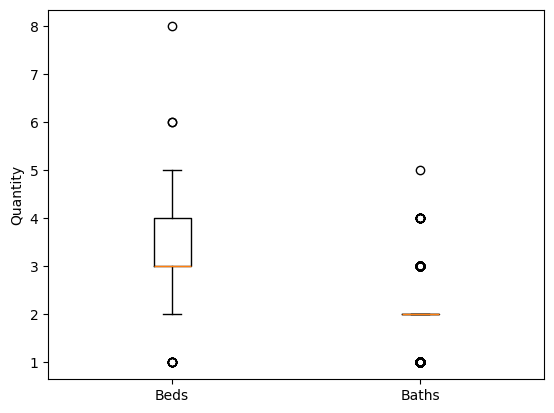

In [177]:
import matplotlib.pyplot as plt
plt.boxplot([df['beds'], df['baths']])
plt.xticks([1, 2], ['Beds', 'Baths']) 
plt.ylabel("Quantity")
plt.show()

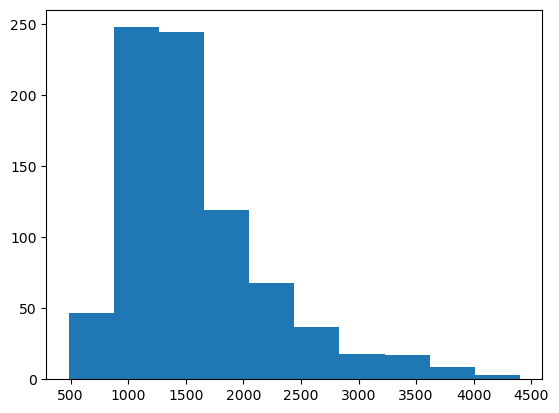

In [179]:
plt.hist(df["sq__ft"])
plt.show()

In [181]:
#Beds, baths and sq_ft all have a right skewed distribution. Not removing outliers or normalising as the data appears to he naturally skewed.

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [186]:
#price because we are looking for variables on price.

#### 2.2 List all possible variables which might be Predictor variable.

In [189]:
#zip, beds, baths, sq__ft

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [192]:
print(np.corrcoef(df['price'], df['zip']))
print(np.corrcoef(df['price'], df['beds']))
print(np.corrcoef(df['price'], df['baths']))
print(np.corrcoef(df['price'], df['sq__ft']))

[[ 1.         -0.22299891]
 [-0.22299891  1.        ]]
[[1.         0.44182494]
 [0.44182494 1.        ]]
[[1.         0.51196621]
 [0.51196621 1.        ]]
[[1.         0.72804967]
 [0.72804967 1.        ]]


In [194]:
from scipy import stats
print(stats.pearsonr(df['price'], df['zip']))
print(stats.pearsonr(df['price'], df['beds']))
print(stats.pearsonr(df['price'], df['baths']))
print(stats.pearsonr(df['price'], df['sq__ft']))

PearsonRResult(statistic=-0.22299890589279758, pvalue=1.346576816824659e-10)
PearsonRResult(statistic=0.44182493533223954, pvalue=4.458201049176672e-40)
PearsonRResult(statistic=0.5119662120950297, pvalue=2.1870064902055688e-55)
PearsonRResult(statistic=0.7280496651400227, pvalue=8.467018783193586e-135)


In [196]:
#Sq__ft is the best predictor because it's correlation coefficient is furthest from 0.

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict the price of a house using the price values alone? (Hint: it is a simple calculation)



In [199]:
prediction = df['price'].mean()
print(prediction)

230004.53760789149


#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [202]:
difference = abs(df["price"] - prediction)
print(difference)

0      170782.537608
1      161792.537608
2      161124.537608
3      160697.537608
4      148104.537608
           ...      
980      2420.462392
981      3995.462392
982      4995.462392
983      5296.462392
984      5733.462392
Name: price, Length: 811, dtype: float64


#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [206]:
X = df['sq__ft']
Y = df['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [209]:
Xbar = X.mean()
Ybar = Y.mean()

beta_1 = ((Y - Ybar) * (X - Xbar)).sum() / ((X - Xbar)**2).sum()
print(beta_1)

134.4875034945949


##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [213]:
beta_0 = Ybar - beta_1 * Xbar
print(beta_0)

16539.703716471326


##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [217]:
Yhat = beta_0 + beta_1 * X
print(Yhat)

0      128971.256638
1      173486.620295
2      123591.756498
3      131123.056694
4      123726.244002
           ...      
980    323171.211684
981    215177.746378
982    180076.507966
983    243151.147105
984    199711.683476
Name: sq__ft, Length: 811, dtype: float64


##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [221]:
residuals = Y - Yhat
print(residuals)

0      -69749.256638
1     -105274.620295
2      -54711.756498
3      -61816.056694
4      -41826.244002
           ...      
980    -90746.211684
981     18822.253622
982     54923.492034
983     -7850.147105
984     36026.316524
Length: 811, dtype: float64


##### 2.7.E Find R-Squared

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{tot} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Squared value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [225]:
SStot = ((Y - Ybar)**2).sum()
print(SStot)
SSres = ((Y - Yhat)**2).sum()
print(SSres)
R_squared = 1 - SSres/SStot
print(R_squared)

11591278647637.602
5447248202570.053
0.5300563149104998


In [227]:
#R-squared of 48% means that sq__ft explains 48% of the variability of price around its mean. 

## 2.7.F [BONUS] Draw Plot of Predicted Line

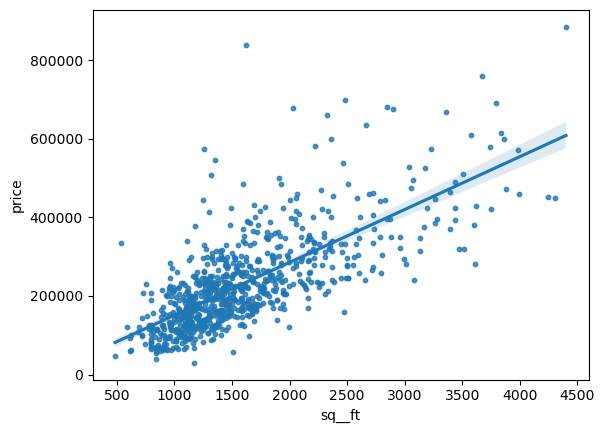

In [230]:
import seaborn as sns
sns.regplot(data = df, x ='sq__ft', y = 'price', scatter_kws={'s': 10})
plt.show()

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

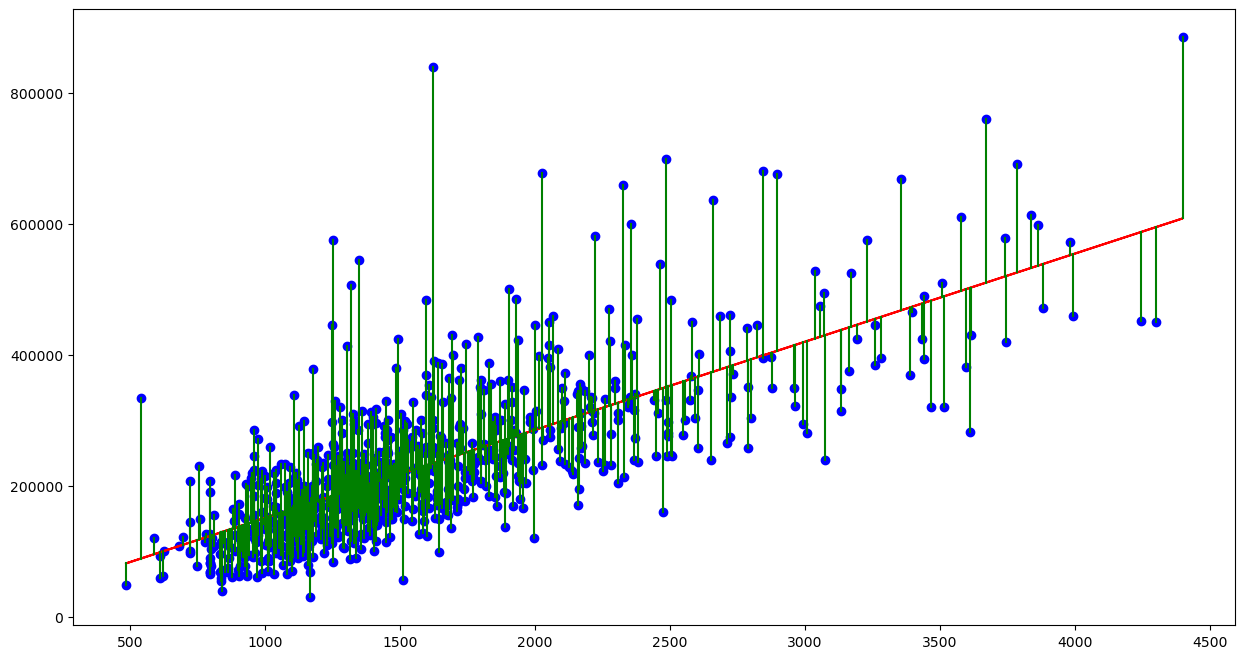

In [233]:
df['Yhat'] = Yhat
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=X, y=Y, c='b')
ax.plot(X, Yhat, color='r');

# iterate over predictions
for _, row in df.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Yhat']), 'g-')

plt.show()

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [237]:
price = beta_1 * 1204 + beta_0
print(price)

178462.6579239636




---



---



> > > > > > > > > © 2024 Institute of Data


---



---



